# Cleaning dataset and autolabeling
This project wants to show how to take an unknown dataset. All what we know about it is that has photos of flowers: sunflowers and roses but it is not curated. The objective is to create a dataset with labeled data which we could use to train a supervised learning algorithm.
### Tests which will be done during the analysis
- Use resnet50 for differencing flowers from other type of labels in the dataset. This is made using the semantic pretrained knowledge of the CNN from a embedding perspective.
- Reduce dimensions to extract better conclusions with a sum up of the data descriptors.
- Cluster the information in order to obtain the main groups which could be found and try to delete those which are not being part of the data we want to use for our supervised learning.
- Eliminate those groups and choose the most probable elections in the flowers group.
- Then use autoencoder to obtain the most important features within the dataset to divide it into two groups. This features could be mixed with the embedding of the resnet or use it alone. Some tests has to be done.

## Obtain the dataset
Download the dataset zip and unzip it to obtain the image folder to start working.

In [ ]:
# Loading dataset on google colab environment
#!gdown --id 14hxZJ6-HHJ4MAehvrJjPErTyelCLw7Zl

# Unzipping dataset
!unzip drive/MyDrive/technical_test_images.zip

Archive:  drive/MyDrive/technical_test_images.zip
   creating: technical_test_images/
  inflating: technical_test_images/imagen847.jpg  
  inflating: __MACOSX/technical_test_images/._imagen847.jpg  
  inflating: technical_test_images/imagen853.jpg  
  inflating: __MACOSX/technical_test_images/._imagen853.jpg  
  inflating: technical_test_images/imagen884.jpg  
  inflating: __MACOSX/technical_test_images/._imagen884.jpg  
  inflating: technical_test_images/imagen648.jpg  
  inflating: __MACOSX/technical_test_images/._imagen648.jpg  
  inflating: technical_test_images/imagen890.jpg  
  inflating: __MACOSX/technical_test_images/._imagen890.jpg  
  inflating: technical_test_images/imagen1329.jpg  
  inflating: __MACOSX/technical_test_images/._imagen1329.jpg  
  inflating: technical_test_images/imagen1301.jpg  
  inflating: __MACOSX/technical_test_images/._imagen1301.jpg  
  inflating: technical_test_images/imagen106.jpg  
  inflating: __MACOSX/technical_test_images/._imagen106.jpg  
  infl

## Load the images from the folder and calculate the embeddings

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import os
import pandas as pd
import numpy as np

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define a transform for image preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create a DataFrame to store metadata and feature vectors
data = {'filename': [], 'feature_vector': []}

# Path to your dataset folder
dataset_folder = '/content/technical_test_images'

# Process and extract feature vectors for each image
for filename in os.listdir(dataset_folder):
    image_path = os.path.join(dataset_folder, filename)

    # Check if the file is a valid image
    if not os.path.isfile(image_path):
        continue

    try:
        # Load and preprocess the image
        img = Image.open(image_path).convert('RGB')
        img = transform(img).unsqueeze(0)  # Add a batch dimension

        # Extract feature vector
        with torch.no_grad():
            features = model(img)

        # Append metadata and feature vector to the DataFrame
        data['filename'].append(filename)
        data['feature_vector'].append(features.squeeze().numpy().tolist())  # Convert to list of floats

        # Print a message for successful processing
        print(f"Processed: {image_path}")

    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file for further analysis with floats
df.to_csv('embeddings.csv', index=False, float_format='%.6f')  # Specify float_format to control float precision

# Print a message after saving the CSV
print("CSV file saved successfully.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 125MB/s]


Processed: /content/technical_test_images/imagen1064.jpg
Processed: /content/technical_test_images/imagen579.jpg
Processed: /content/technical_test_images/imagen843.jpg
Processed: /content/technical_test_images/imagen462.jpg
Processed: /content/technical_test_images/imagen1342.jpg
Processed: /content/technical_test_images/imagen950.jpg
Processed: /content/technical_test_images/imagen1341.jpg
Processed: /content/technical_test_images/imagen1397.jpg
Processed: /content/technical_test_images/imagen113.jpg
Processed: /content/technical_test_images/imagen972.jpg
Processed: /content/technical_test_images/imagen1276.jpg
Processed: /content/technical_test_images/imagen769.jpg
Processed: /content/technical_test_images/imagen529.jpg
Processed: /content/technical_test_images/imagen783.jpg
Processed: /content/technical_test_images/imagen733.jpg
Processed: /content/technical_test_images/imagen1235.jpg
Processed: /content/technical_test_images/imagen1275.jpg
Processed: /content/technical_test_images

In [ ]:
!pip install umap-learn
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a728dbe973e8612572d8a9dfb4e6ca1ac577b3b7badc6d8ab7e8ca7fc2a64b1c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=64d2009c4d1831625ef06d4eecc8de9c755612830cda252b1399249f629896fb
  S

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


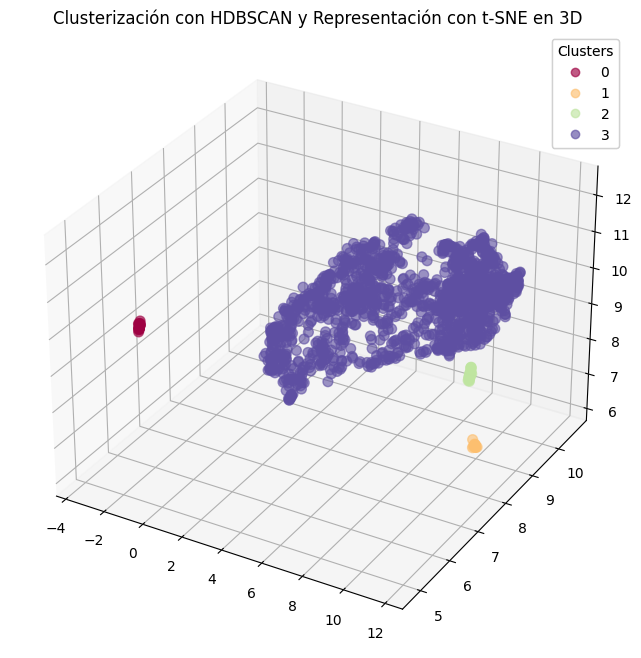

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Cargar los embeddings
df = pd.read_csv('embeddings.csv')  # Ajusta la ruta según sea necesario
embeddings = np.array(df['feature_vector'].apply(pd.eval).tolist())

# Normalizar los embeddings
scaler = StandardScaler()
embeddings_normalized = scaler.fit_transform(embeddings)

# Reducción de Dimensionalidad a 100 dimensiones con UMAP
reducer_100d = umap.UMAP(n_components=3, random_state=42)
embeddings_100d = reducer_100d.fit_transform(embeddings_normalized)

# Aplicar Clustering con HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
labels = clusterer.fit_predict(embeddings_100d)

# Representación con t-SNE en 3 Dimensiones
#tsne = TSNE(n_components=3, random_state=42)
embeddings_3d_tsne = embeddings_100d

# Visualización de la clusterización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d_tsne[:, 0], embeddings_3d_tsne[:, 1], embeddings_3d_tsne[:, 2], c=labels, cmap='Spectral', s=50, alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.title('Clusterización con HDBSCAN y Representación con t-SNE en 3D')
plt.show()


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import hdbscan

# Cargar los embeddings y los nombres de archivo de las imágenes desde 'embeddings.csv'
df = pd.read_csv('embeddings.csv')  # Asegúrate de ajustar la ruta según sea necesario
embeddings = np.array(df['feature_vector'].apply(pd.eval).tolist())
filenames = df['filename'].values

# Normalizar los embeddings
scaler = StandardScaler()
embeddings_normalized = scaler.fit_transform(embeddings)

# Reducción de dimensionalidad y clustering
reducer_100d = umap.UMAP(n_components=100, random_state=42)
embeddings_100d = reducer_100d.fit_transform(embeddings_normalized)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(embeddings_100d)

# Identificar el cluster más grande
unique, counts = np.unique(labels, return_counts=True)
largest_cluster_id = unique[np.argmax(counts)]

# Filtrar nombres de archivo del cluster más grande
indices_largest_cluster = np.where(labels == largest_cluster_id)[0]
filenames_largest_cluster = filenames[indices_largest_cluster]

# Filtrar embeddings del cluster más grande
embeddings_largest_cluster = embeddings_normalized[indices_largest_cluster]

# Crear una nueva carpeta para el cluster más grande
output_folder = 'largest_cluster_images'
os.makedirs(output_folder, exist_ok=True)

# Asumiendo que tienes un directorio base para las imágenes, copia las imágenes del cluster más grande a la nueva carpeta
base_image_directory = '/content/technical_test_images/'  # Ajusta esto a la ubicación de tus imágenes
for filename in filenames_largest_cluster:
    source_path = os.path.join(base_image_directory, filename)
    destination_path = os.path.join(output_folder, filename)
    shutil.copy(source_path, destination_path)

print(f"Imágenes del cluster más grande copiadas a {output_folder}.")

# Crear un DataFrame con los embeddings filtrados y los nombres de los archivos
df_filtered = pd.DataFrame({
    'filename': filenames_largest_cluster,
    'feature_vector': [list(embedding) for embedding in embeddings_largest_cluster]
})

# Guardar el DataFrame filtrado en un nuevo archivo CSV
filtered_embeddings_csv = 'filtered_embeddings.csv'
df_filtered.to_csv(filtered_embeddings_csv, index=False)

print(f"Embeddings del cluster más grande guardados en {filtered_embeddings_csv}.")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Imágenes del cluster más grande copiadas a largest_cluster_images.
Embeddings del cluster más grande guardados en filtered_embeddings.csv.


In [ ]:
print(len(embeddings))
print(len(filenames_largest_cluster))

1576
1512


In the same way we have just separated the embeddings by clustering we could use now with that knowledge which could be the mean embedding which could be used for separating the flowers from the rest of the images. If we want to make a more powerful level in a future and we want to include more examples which will benefit our training we could create an API which would have the option to introduce new photos, discard those of them which are not in the sunflower/roses dataset and then could create a new model, only if it is best than the previous one.

## Mostrar de forma aleatoria


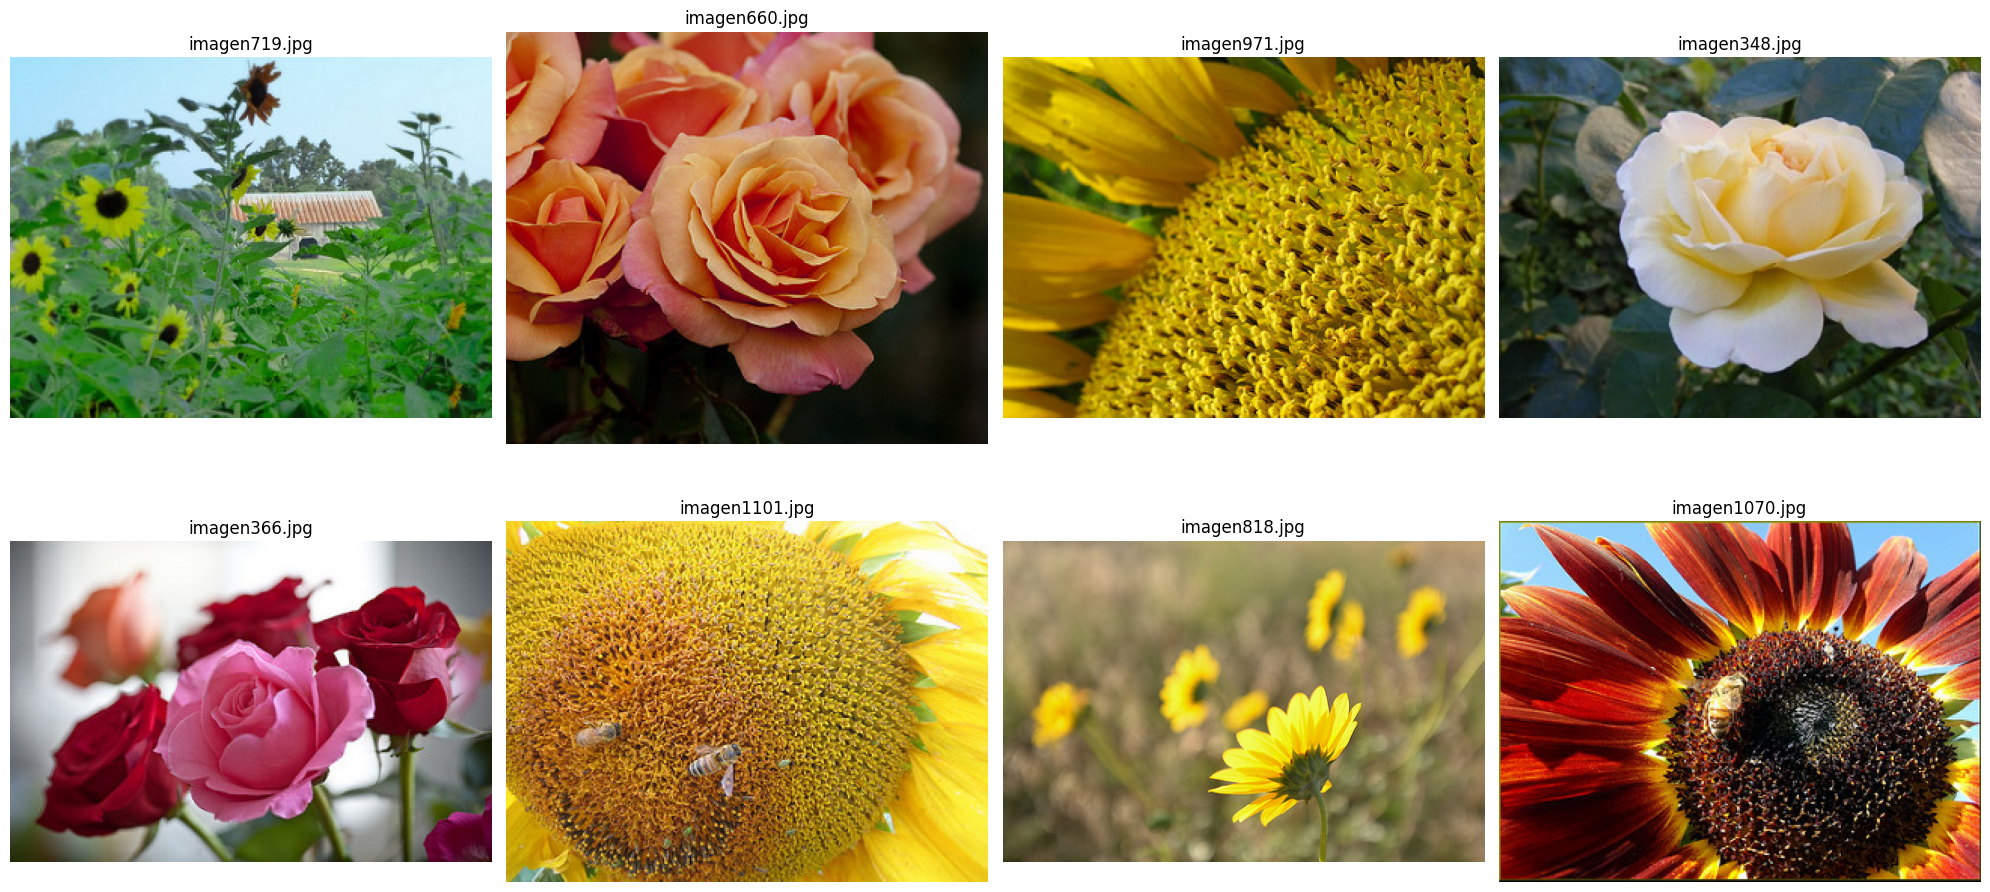

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Especifica la ruta a la carpeta donde se guardaron las imágenes del cluster más grande
folder_path = 'largest_cluster_images'

# Obtén una lista de todos los archivos de imagen en la carpeta
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Selecciona 8 imágenes de forma aleatoria
selected_images = random.sample(image_files, 8)

# Configura el tamaño de la figura para la visualización
plt.figure(figsize=(20, 10))

# Muestra las 8 imágenes seleccionadas
for i, image_name in enumerate(selected_images, 1):
    # Carga la imagen
    image_path = os.path.join(folder_path, image_name)
    image = Image.open(image_path)

    # Muestra la imagen
    plt.subplot(2, 4, i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_name)

plt.tight_layout()
plt.show()
